/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>

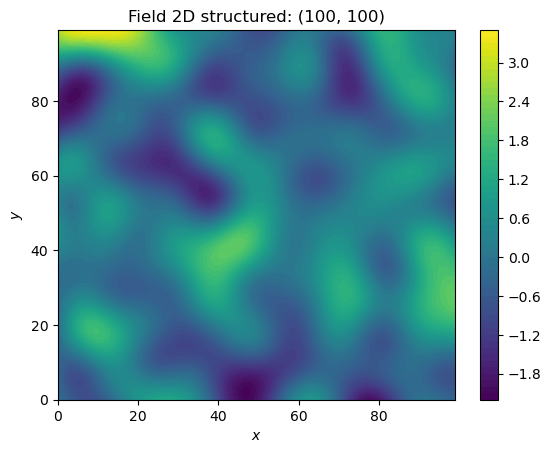

In [1]:
r"""
A Very Simple Example
---------------------

We are going to start with a very simple example of a spatial random field
with an isotropic Gaussian covariance model and following parameters:

- variance :math:`\sigma^2=1`
- correlation length :math:`\lambda=10`

First, we set things up and create the axes for the field. We are going to
need the :any:`SRF` class for the actual generation of the spatial random field.
But :any:`SRF` also needs a covariance model and we will simply take the
:any:`Gaussian` model.
"""

import gstools as gs

x = y = range(100)

###############################################################################
# Now we create the covariance model with the parameters :math:`\sigma^2` and
# :math:`\lambda` and hand it over to :any:`SRF`. By specifying a seed,
# we make sure to create reproducible results:

model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)

###############################################################################
# With these simple steps, everything is ready to create our first random field.
# We will create the field on a structured grid (as you might have guessed from
# the `x` and `y`), which makes it easier to plot.

field = srf.structured([x, y])
srf.plot()

###############################################################################
# Wow, that was pretty easy!


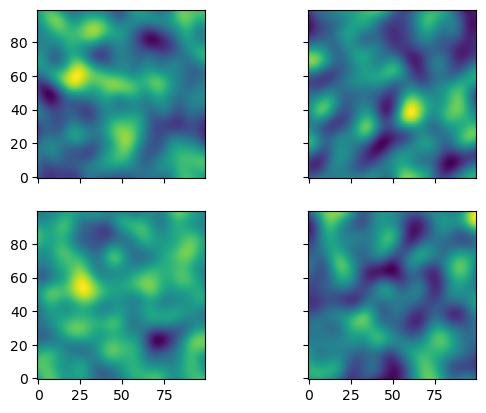

In [2]:
"""
Creating an Ensemble of Fields
------------------------------

Creating an ensemble of random fields would also be
a great idea. Let's reuse most of the previous code.

We will set the position tuple `pos` before generation to reuse it afterwards.
"""

import matplotlib.pyplot as pt
import numpy as np

import gstools as gs

x = y = np.arange(100)

model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model)
srf.set_pos([x, y], "structured")

###############################################################################
# This time, we did not provide a seed to :any:`SRF`, as the seeds will used
# during the actual computation of the fields. We will create four ensemble
# members, for better visualisation, save them in to srf class and in a first
# step, we will be using the loop counter as the seeds.

ens_no = 4
for i in range(ens_no):
    srf(seed=i, store=f"field{i}")

###############################################################################
# Now let's have a look at the results. We can access the fields by name or
# index:

fig, ax = pt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[i].T, origin="lower")
pt.show()

###############################################################################
# Using better Seeds
# ^^^^^^^^^^^^^^^^^^
#
# It is not always a good idea to use incrementing seeds. Therefore GSTools
# provides a seed generator :any:`MasterRNG`. The loop, in which the fields are
# generated would then look like

from gstools.random import MasterRNG

seed = MasterRNG(20170519)
for i in range(ens_no):
    srf(seed=seed(), store=f"better_field{i}")

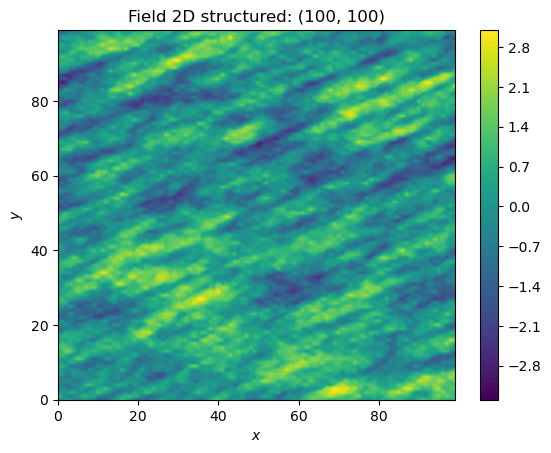

In [3]:
r"""
Creating Fancier Fields
-----------------------

Only using Gaussian covariance fields gets boring. Now we are going to create
much rougher random fields by using an exponential covariance model and we are going to make them anisotropic.

The code is very similar to the previous examples, but with a different
covariance model class :any:`Exponential`. As model parameters we a using
following

- variance :math:`\sigma^2=1`
- correlation length :math:`\lambda=(12, 3)^T`
- rotation angle :math:`\theta=\pi/8`

"""

import numpy as np

import gstools as gs

x = y = np.arange(100)
model = gs.Exponential(dim=2, var=1, len_scale=[12.0, 3.0], angles=np.pi / 8)
srf = gs.SRF(model, seed=20170519)
srf.structured([x, y])
srf.plot()

###############################################################################
# The anisotropy ratio could also have been set with

model = gs.Exponential(dim=2, var=1, len_scale=12, anis=0.25, angles=np.pi / 8)


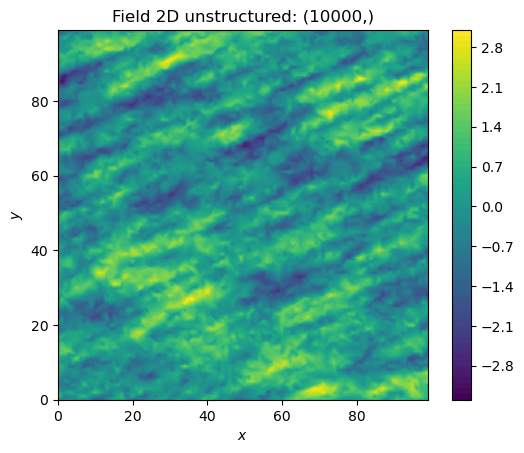

In [4]:
"""
Using an Unstructured Grid
--------------------------

For many applications, the random fields are needed on an unstructured grid.
Normally, such a grid would be read in, but we can simply generate one and
then create a random field at those coordinates.
"""
import numpy as np

import gstools as gs

###############################################################################
# Creating our own unstructured grid
seed = gs.random.MasterRNG(19970221)
rng = np.random.RandomState(seed())
x = rng.randint(0, 100, size=10000)
y = rng.randint(0, 100, size=10000)

model = gs.Exponential(dim=2, var=1, len_scale=[12, 3], angles=np.pi / 8)
srf = gs.SRF(model, seed=20170519)
field = srf((x, y))
srf.vtk_export("field")
# Or create a PyVista dataset
# mesh = srf.to_pyvista()

###############################################################################
ax = srf.plot()
ax.set_aspect("equal")

###############################################################################
# Comparing this image to the previous one, you can see that be using the same
# seed, the same field can be computed on different grids.


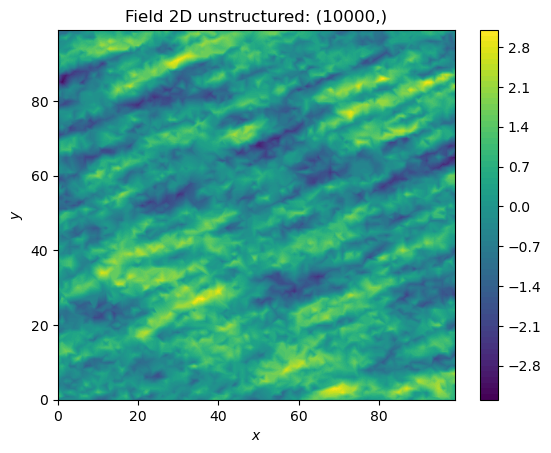

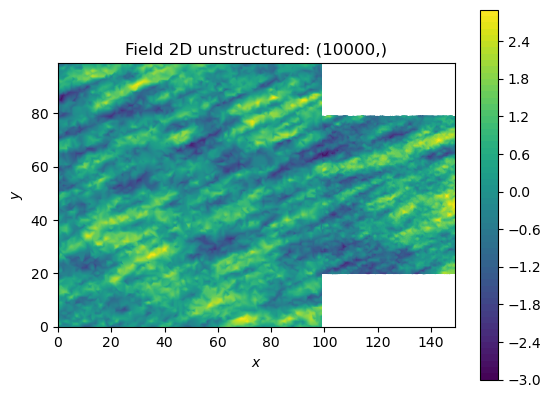

In [5]:
"""
Merging two Fields
------------------

We can even generate the same field realisation on different grids. Let's try
to merge two unstructured rectangular fields.

"""
# sphinx_gallery_thumbnail_number = 2
import numpy as np

import gstools as gs

# creating our own unstructured grid
seed = gs.random.MasterRNG(19970221)
rng = np.random.RandomState(seed())
x = rng.randint(0, 100, size=10000)
y = rng.randint(0, 100, size=10000)

model = gs.Exponential(dim=2, var=1, len_scale=[12, 3], angles=np.pi / 8)
srf = gs.SRF(model, seed=20170519)
field1 = srf((x, y))
srf.plot()
###############################################################################
# But now we extend the field on the right hand side by creating a new
# unstructured grid and calculating a field with the same parameters and the
# same seed on it:

# new grid
seed = gs.random.MasterRNG(20011012)
rng = np.random.RandomState(seed())
x2 = rng.randint(99, 150, size=10000)
y2 = rng.randint(20, 80, size=10000)

field2 = srf((x2, y2))
ax = srf.plot()
ax.tricontourf(x, y, field1.T, levels=256)
ax.set_aspect("equal")

###############################################################################
# The slight mismatch where the two fields were merged is merely due to
# interpolation problems of the plotting routine. You can convince yourself
# be increasing the resolution of the grids by a factor of 10.
#
# Of course, this merging could also have been done by appending the grid
# point ``(x2, y2)`` to the original grid ``(x, y)`` before generating the field.
# But one application scenario would be to generate hugh fields, which would not
# fit into memory anymore.


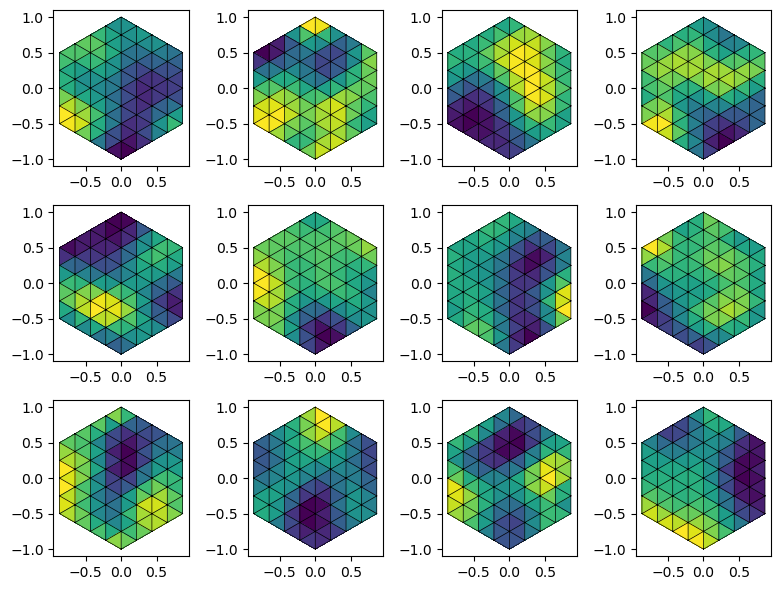

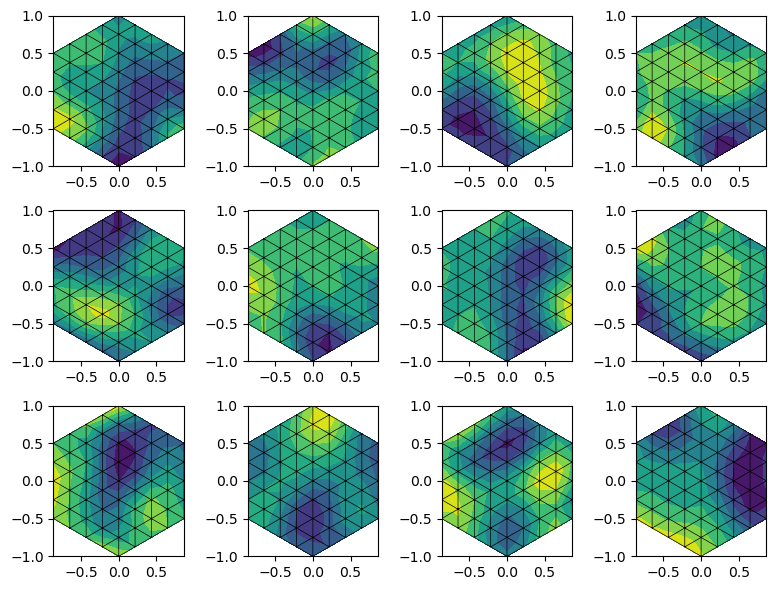

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

In [6]:
"""
Generating Fields on Meshes
---------------------------

GSTools provides an interface for meshes, to support
`meshio <https://github.com/nschloe/meshio>`_ and
`ogs5py <https://github.com/GeoStat-Framework/ogs5py>`_ meshes.

When using `meshio`, the generated fields will be stored immediately in the
mesh container.

There are two options to generate a field on a given mesh:

- `points="points"` will generate a field on the mesh points
- `points="centroids"` will generate a field on the cell centroids

In this example, we will generate a simple mesh with the aid of
`meshzoo <https://github.com/nschloe/meshzoo>`_.
"""

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import meshio
import meshzoo
import numpy as np

import gstools as gs

# generate a triangulated hexagon with meshzoo
points, cells = meshzoo.ngon(6, 4)
mesh = meshio.Mesh(points, {"triangle": cells})

###############################################################################
# Now we prepare the SRF class as always. We will generate an ensemble of
# fields on the generated mesh.

# number of fields
fields_no = 12
# model setup
model = gs.Gaussian(dim=2, len_scale=0.5)
srf = gs.SRF(model, mean=1)

###############################################################################
# To generate fields on a mesh, we provide a separate method: :any:`SRF.mesh`.
# First we generate fields on the mesh-centroids controlled by a seed.
# You can specify the field name by the keyword `name`.

for i in range(fields_no):
    srf.mesh(mesh, points="centroids", name=f"c-field-{i}", seed=i)

###############################################################################
# Now we generate fields on the mesh-points again controlled by a seed.

for i in range(fields_no):
    srf.mesh(mesh, points="points", name=f"p-field-{i}", seed=i)

###############################################################################
# To get an impression we now want to plot the generated fields.
# Luckily, matplotlib supports triangular meshes.

triangulation = tri.Triangulation(points[:, 0], points[:, 1], cells)
# figure setup
cols = 4
rows = int(np.ceil(fields_no / cols))

###############################################################################
# Cell data can be easily visualized with matplotlibs `tripcolor`.
# To highlight the cell structure, we use `triplot`.

fig = plt.figure(figsize=[2 * cols, 2 * rows])
for i, field in enumerate(mesh.cell_data, 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.tripcolor(triangulation, mesh.cell_data[field][0])
    ax.triplot(triangulation, linewidth=0.5, color="k")
    ax.set_aspect("equal")
fig.tight_layout()

###############################################################################
# Point data is plotted via `tricontourf`.

fig = plt.figure(figsize=[2 * cols, 2 * rows])
for i, field in enumerate(mesh.point_data, 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.tricontourf(triangulation, mesh.point_data[field])
    ax.triplot(triangulation, linewidth=0.5, color="k")
    ax.set_aspect("equal")
fig.tight_layout()
plt.show()

###############################################################################
# Last but not least, `meshio` can be used for what is does best: Exporting.
# Tada!

mesh.write("mesh_ensemble.vtk")



In [7]:
"""
Using PyVista meshes
--------------------

`PyVista <https://www.pyvista.org>`__ is a helper module for the
Visualization Toolkit (VTK) that takes a different approach on interfacing with
VTK through NumPy and direct array access.

It provides mesh data structures and filtering methods for spatial datasets,
makes 3D plotting simple and is built for large/complex data geometries.

The :any:`Field.mesh` method enables easy field creation on PyVista meshes
used by the :any:`SRF` or :any:`Krige` class.
"""
# sphinx_gallery_thumbnail_path = 'pics/GS_pyvista_cut.png'
import pyvista as pv

import gstools as gs

###############################################################################
# We create a structured grid with PyVista containing 50 segments on all three
# axes each with a length of 2 (whatever unit).

dim, spacing = (50, 50, 50), (2, 2, 2)
grid = pv.UniformGrid(dim, spacing)

###############################################################################
# Now we set up the SRF class as always. We'll use an anisotropic model.

model = gs.Gaussian(dim=3, len_scale=[16, 8, 4], angles=(0.8, 0.4, 0.2))
srf = gs.SRF(model, seed=19970221)

###############################################################################
# The PyVista mesh can now be directly passed to the :any:`SRF.mesh` method.
# When dealing with meshes, one can choose if the field should be generated
# on the mesh-points (`"points"`) or the cell-centroids (`"centroids"`).
#
# In addition we can set a name, under which the resulting field is stored
# in the mesh.

srf.mesh(grid, points="points", name="random-field")

###############################################################################
# Now we have access to PyVista's abundancy of methods to explore the field.
#
# .. note::
#    PyVista is not working on readthedocs, but you can try it out yourself by
#    uncommenting the following line of code.

# grid.contour(isosurfaces=8).plot()

###############################################################################
# The result should look like this:
#
# .. image:: https://github.com/GeoStat-Framework/GeoStat-Framework.github.io/raw/master/img/GS_pyvista_cut.png
#    :width: 400px
#    :align: center


ModuleNotFoundError: No module named 'pyvista'

In [ ]:
"""
Higher Dimensions
-----------------

GSTools provides experimental support for higher dimensions.

Anisotropy is the same as in lower dimensions:

- in `n` dimensions we need `(n-1)` anisotropy ratios

Rotation on the other hand is a bit more complex.
With increasing dimensions more and more rotation angles are added in order
to properply describe the rotated axes of anisotropy.

By design the first rotation angles coincide with the lower ones:

- 2D (rotation in x-y plane) -> 3D: first angle describes xy-plane rotation
- 3D (Tait-Bryan angles) -> 4D: first 3 angles coincide with Tait-Bryan angles

By increasing the dimension from `n` to `(n+1)`, `n` angles are added:

- 2D (1 angle) -> 3D: 3 angles (2 added)
- 3D (3 angles) -> 4D: 6 angles (3 added)

the following list of rotation-planes are described by the list of
angles in the model:

1. x-y plane
2. x-z plane
3. y-z plane
4. x-v plane
5. y-v plane
6. z-v plane
7. ...

The rotation direction in these planes have alternating signs
in order to match Tait-Bryan in 3D.

Let's have a look at a 4D example, where we naively add a 4th dimension.
"""

import matplotlib.pyplot as plt

import gstools as gs

dim = 4
size = 20
pos = [range(size)] * dim
model = gs.Exponential(dim=dim, len_scale=5)
srf = gs.SRF(model, seed=20170519)
field = srf.structured(pos)

###############################################################################
# In order to "prove" correctness, we can calculate an empirical variogram
# of the generated field and fit our model to it.

bin_center, vario = gs.vario_estimate(
    pos, field, sampling_size=2000, mesh_type="structured"
)
model.fit_variogram(bin_center, vario)
print(model)

###############################################################################
# As you can see, the estimated variance and length scale match our input
# quite well.
#
# Let's have a look at the fit and a x-y cross-section of the 4D field:

f, a = plt.subplots(1, 2, gridspec_kw={"width_ratios": [2, 1]}, figsize=[9, 3])
model.plot(x_max=max(bin_center), ax=a[0])
a[0].scatter(bin_center, vario)
a[1].imshow(field[:, :, 0, 0].T, origin="lower")
a[0].set_title("isotropic empirical variogram with fitted model")
a[1].set_title("x-y cross-section")
f.show()

###############################################################################
# GSTools also provides plotting routines for higher dimensions.
# Fields are shown by 2D cross-sections, where other dimensions can be
# controlled via sliders.

srf.plot()